<a href="https://colab.research.google.com/github/lisaong/mldds-courseware/blob/master/workshops/iris_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow.keras as keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
X, y = load_iris(return_X_y=True)
X

In [0]:
y

In [0]:
num_classes=3
y_cat = keras.utils.to_categorical(y, num_classes)
y_cat

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat)

In [0]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train_sc = scaler.fit_transform(X_train)

In [0]:
# neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(num_classes, input_shape=(4,), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# incremental fit

history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=.2)

Train on 89 samples, validate on 23 samples
Epoch 1/100
89/89 [==============================] - 0s 4ms/sample - loss: 1.8040 - accuracy: 0.3258 - val_loss: 2.1754 - val_accuracy: 0.1739
Epoch 2/100
89/89 [==============================] - 0s 276us/sample - loss: 1.5722 - accuracy: 0.3034 - val_loss: 2.0003 - val_accuracy: 0.3478
Epoch 3/100
89/89 [==============================] - 0s 285us/sample - loss: 1.5020 - accuracy: 0.3034 - val_loss: 1.8770 - val_accuracy: 0.2609
Epoch 4/100
89/89 [==============================] - 0s 289us/sample - loss: 1.4697 - accuracy: 0.2921 - val_loss: 1.7663 - val_accuracy: 0.2609
Epoch 5/100
89/89 [==============================] - 0s 281us/sample - loss: 1.4090 - accuracy: 0.3708 - val_loss: 1.7039 - val_accuracy: 0.3043
Epoch 6/100
89/89 [==============================] - 0s 285us/sample - loss: 1.3388 - accuracy: 0.3371 - val_loss: 1.6397 - val_accuracy: 0.3913
Epoch 7/100
89/89 [==============================] - 0s 268us/sample - loss: 1.2980 - ac

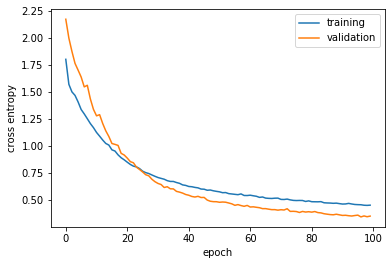

In [29]:
# plot learning curve
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots()
ax.plot(loss, label='training')
ax.plot(val_loss, label='validation')
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('cross entropy')
plt.show()